In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Training Data
train_data = pd.read_excel("train_data.xlsx")

In [17]:
train_data.head() # Display the 1st few rows of the dataset

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [18]:
train_data.describe()

,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


In [19]:
train_data.isnull().sum() # Checking Missing Values

,0
customer_id,0
transaction_date,0
sub_grade,0
term,0
home_ownership,0
cibil_score,0
total_no_of_acc,0
annual_inc,0
int_rate,0
purpose,0


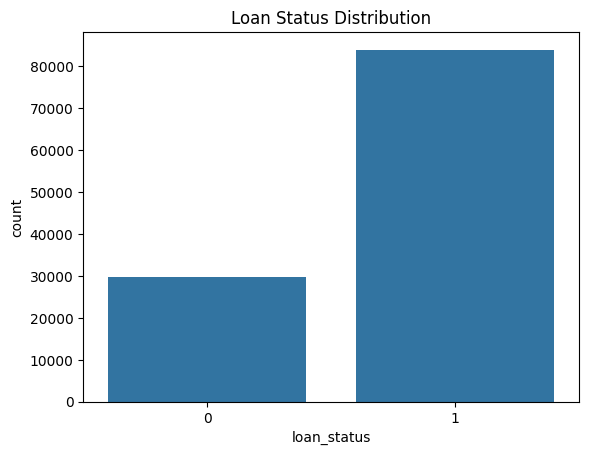

In [20]:
# Visualize the Distribution of Loan Status

sns.countplot(x="loan_status", data=train_data)
plt.title("Loan Status Distribution")
plt.show()

Text(0.5, 1.0, 'CIBIL Score Distribution')

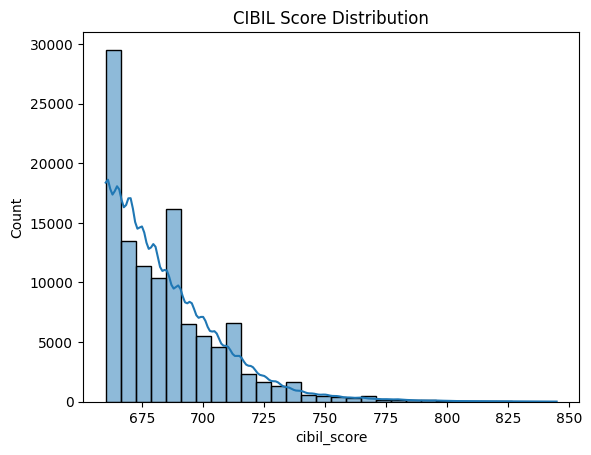

In [21]:
sns.histplot(train_data["cibil_score"], bins=30, kde=True)
plt.title("CIBIL Score Distribution")

In [22]:
# Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'C5'

<Figure size 1200x800 with 0 Axes>

In [ ]:
categorial_features = ["sub_grade", "home_ownership", "purpose", "application_type", "verification_status"]
for feature in categorial_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue="loan_status", data=train_data)
    plt.title(f"Distribution of {feature} by Loan Status")
    plt.xticks(rotation=45)
    plt.show()